### The features or variables included in the dataset are as follows:

RPM: Indicates the number of rotations per minute for the motor.
Motor Power: Measures the power consumption of the electric motor in kilowatts.
Torque: Provides the torque produced by the motor in Newton-meter.
Outlet Pressure Bar: Denotes the outlet pressure of compressed air in bars.
Air Flow: Displays the flow rate of compressed air in cubic meters per minute.
Noise dB: Represents the noise level of the compressor system in decibels.
Outlet Temp: Shows the outlet temperature of the compressed air in degrees Celsius.
Water Pump Outlet Pressure: Gives the outlet pressure of the water pump in bars.
Water Inlet Temp: Specifies the inlet temperature of cooling water in degrees Celsius.
Water Outlet Temp: Provides the outlet temperature of cooling water in degrees Celsius.
Water Pump Power: Measures the power consumption of the water pump in kilowatts.
Water Flow: Indicates the cooling water flow rate in cubic meters per minute.
Oil Pump Power: This represents the power consumption of the oil pump in kilowatts.
Oil Tank Temp: Shows the temperature of the oil tank in degrees Celsius.
Ground Acceleration: Represents the acceleration experienced by the compressor at its mounting point, measured in the X, Y, and Z directions in meters per second squared.
Head Acceleration: Refers to the acceleration value measured at the compressor head bolt or upper cooling fin in the X, Y, and Z directions, typically expressed in gravitational units.
Bearings_status: Indicates the condition of the bearings in the motor and compressor system. The values can be ‘Ok’(0) for properly functioning bearings or ‘Noise’(1) for bearings that may need maintenance or replacement due to wear or damage affecting the performance and efficiency of the compressor.

### Note- We will be predicting the need of a compressor maintenance based on status of bearing. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('aircompressor.csv')

#### Lets understand the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1000 non-null   int64  
 1   rpm                  1000 non-null   int64  
 2   motor_power          1000 non-null   float64
 3   torque               1000 non-null   float64
 4   outlet_pressure_bar  1000 non-null   float64
 5   air_flow             1000 non-null   float64
 6   noise_db             1000 non-null   float64
 7   outlet_temp          1000 non-null   float64
 8   wpump_outlet_press   1000 non-null   float64
 9   water_inlet_temp     1000 non-null   float64
 10  water_outlet_temp    1000 non-null   float64
 11  wpump_power          1000 non-null   float64
 12  water_flow           1000 non-null   float64
 13  oilpump_power        1000 non-null   float64
 14  oil_tank_temp        1000 non-null   float64
 15  gaccx                1000 non-null   fl

In [4]:
df.shape

(1000, 25)

In [5]:
df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.711820,0.383773,2.649801,1.213344,1.409218,2.962484,0,0,0,0
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.704667,0.450954,2.669423,1.210674,1.379050,2.938135,0,0,0,0
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.704828,0.443924,2.772009,1.210612,1.373490,2.991878,0,0,0,0
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.726604,0.370457,2.876056,1.213223,1.443234,3.096158,0,0,0,0
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.707785,0.383868,2.849451,1.209216,1.405190,3.059417,0,0,0,0


In [6]:
df.sample(5)

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve
413,414,1509,4895.644329,35.819227,2.646,903.006404,51.441031,104.968888,2.917560,73.893111,...,0.568301,0.300922,2.465940,1.072731,1.320762,2.745545,0,0,0,0
220,221,992,4467.107900,46.899109,3.595,595.225166,45.957188,101.850931,2.041368,62.841939,...,0.614408,0.313825,3.260386,1.112370,1.361102,3.185274,0,0,0,0
142,143,491,3035.057001,59.190438,4.340,258.543668,42.467742,110.135858,2.108681,71.921112,...,0.715113,0.405946,4.462324,1.213360,1.449412,3.884116,0,0,1,0
898,899,2510,11287.414810,47.904137,4.136,1511.601998,62.159289,146.345735,2.665464,111.252550,...,0.543654,0.297681,3.330419,1.047346,1.299320,3.148129,0,1,0,0
269,270,1010,6818.495035,65.859117,5.859,593.816812,56.113865,111.919268,2.992554,80.393002,...,0.611118,0.330715,5.398972,1.100363,1.316415,4.221922,1,0,0,0


In [7]:
df.describe()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.0000,1000.0000,1000.0000
mean,500.500000,1499.516000,6984.877371,49.186120,4.054049,754.673930,53.412121,118.855110,2.799610,83.021711,...,0.601789,0.349667,3.923073,1.101253,1.350042,3.495037,0.2000,0.2000,0.2000,0.2000
std,288.819436,707.681915,4269.277571,18.706750,1.862761,442.743491,8.055363,19.120181,0.455274,18.644992,...,0.058719,0.040667,1.610130,0.058546,0.040871,0.817667,0.4002,0.4002,0.4002,0.4002
min,1.000000,480.000000,1402.424603,13.222197,1.000000,95.098952,39.879017,76.902822,1.834533,43.166392,...,0.540045,0.274650,1.730301,1.039910,1.270696,2.329267,0.0000,0.0000,0.0000,0.0000
25%,250.750000,988.750000,3559.437042,33.749857,2.443750,305.388152,46.490976,104.731080,2.448208,68.914714,...,0.558092,0.316543,2.576739,1.057717,1.318785,2.802622,0.0000,0.0000,0.0000,0.0000
50%,500.500000,1500.000000,5906.662534,48.890905,4.038000,608.626411,52.708480,118.275842,2.780492,82.101660,...,0.576814,0.349343,3.610639,1.075392,1.348189,3.339698,0.0000,0.0000,0.0000,0.0000
75%,750.250000,2010.000000,9636.002782,63.672921,5.600250,1193.266273,60.158248,132.850790,3.092101,95.792346,...,0.615021,0.375261,5.081960,1.113696,1.375232,4.071874,0.0000,0.0000,0.0000,0.0000
max,1000.000000,2520.000000,19454.559080,93.540405,8.664000,1539.911634,74.401986,172.711382,4.295136,137.543531,...,0.726604,0.459811,9.209166,1.227134,1.461809,6.107852,1.0000,1.0000,1.0000,1.0000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1000 non-null   int64  
 1   rpm                  1000 non-null   int64  
 2   motor_power          1000 non-null   float64
 3   torque               1000 non-null   float64
 4   outlet_pressure_bar  1000 non-null   float64
 5   air_flow             1000 non-null   float64
 6   noise_db             1000 non-null   float64
 7   outlet_temp          1000 non-null   float64
 8   wpump_outlet_press   1000 non-null   float64
 9   water_inlet_temp     1000 non-null   float64
 10  water_outlet_temp    1000 non-null   float64
 11  wpump_power          1000 non-null   float64
 12  water_flow           1000 non-null   float64
 13  oilpump_power        1000 non-null   float64
 14  oil_tank_temp        1000 non-null   float64
 15  gaccx                1000 non-null   fl

### Data Cleaning

In [9]:
df.isnull().sum()

id                     0
rpm                    0
motor_power            0
torque                 0
outlet_pressure_bar    0
air_flow               0
noise_db               0
outlet_temp            0
wpump_outlet_press     0
water_inlet_temp       0
water_outlet_temp      0
wpump_power            0
water_flow             0
oilpump_power          0
oil_tank_temp          0
gaccx                  0
gaccy                  0
gaccz                  0
haccx                  0
haccy                  0
haccz                  0
bearings               0
wpump                  0
radiator               0
exvalve                0
dtype: int64

### So now we do not have any missing value than lets explore the data to understand the various relationship. 

### Exploratory Data Analysis

<AxesSubplot: xlabel='bearings', ylabel='rpm'>

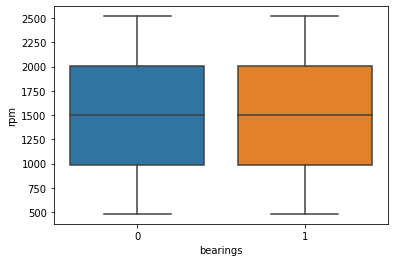

In [10]:
sns.boxplot(x=df['bearings'], y=df['rpm'])

In [11]:
df['bearings'].value_counts()

0    800
1    200
Name: bearings, dtype: int64

<AxesSubplot: xlabel='bearings', ylabel='motor_power'>

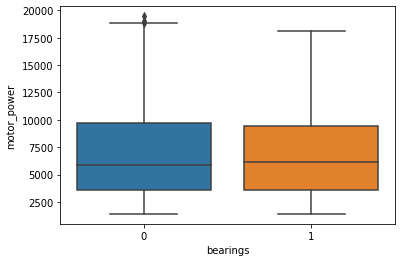

In [12]:
sns.boxplot(x=df['bearings'], y=df['motor_power'])

<AxesSubplot: xlabel='bearings', ylabel='torque'>

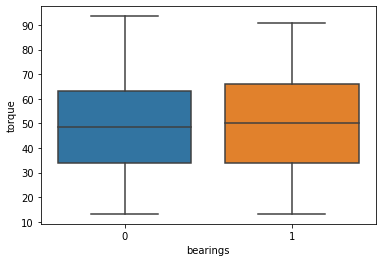

In [13]:
sns.boxplot(x=df['bearings'], y=df['torque'])

<AxesSubplot: xlabel='bearings', ylabel='motor_power'>

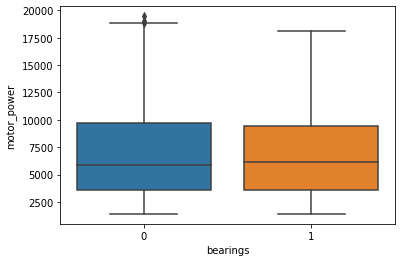

In [14]:
sns.boxplot(x=df['bearings'], y=df['motor_power'])

In [15]:
df.columns

Index(['id', 'rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow',
       'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
       'water_outlet_temp', 'wpump_power', 'water_flow', 'oilpump_power',
       'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz',
       'bearings', 'wpump', 'radiator', 'exvalve'],
      dtype='object')

In [ ]:
columns_to_plot = ['rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow',
       'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
       'water_outlet_temp', 'wpump_power', 'water_flow', 'oilpump_power',
       'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz',
       'bearings']

# Create a pairplot for the selected columns
sns.pairplot(df[columns_to_plot], hue='bearings', diag_kind='hist')
plt.show()

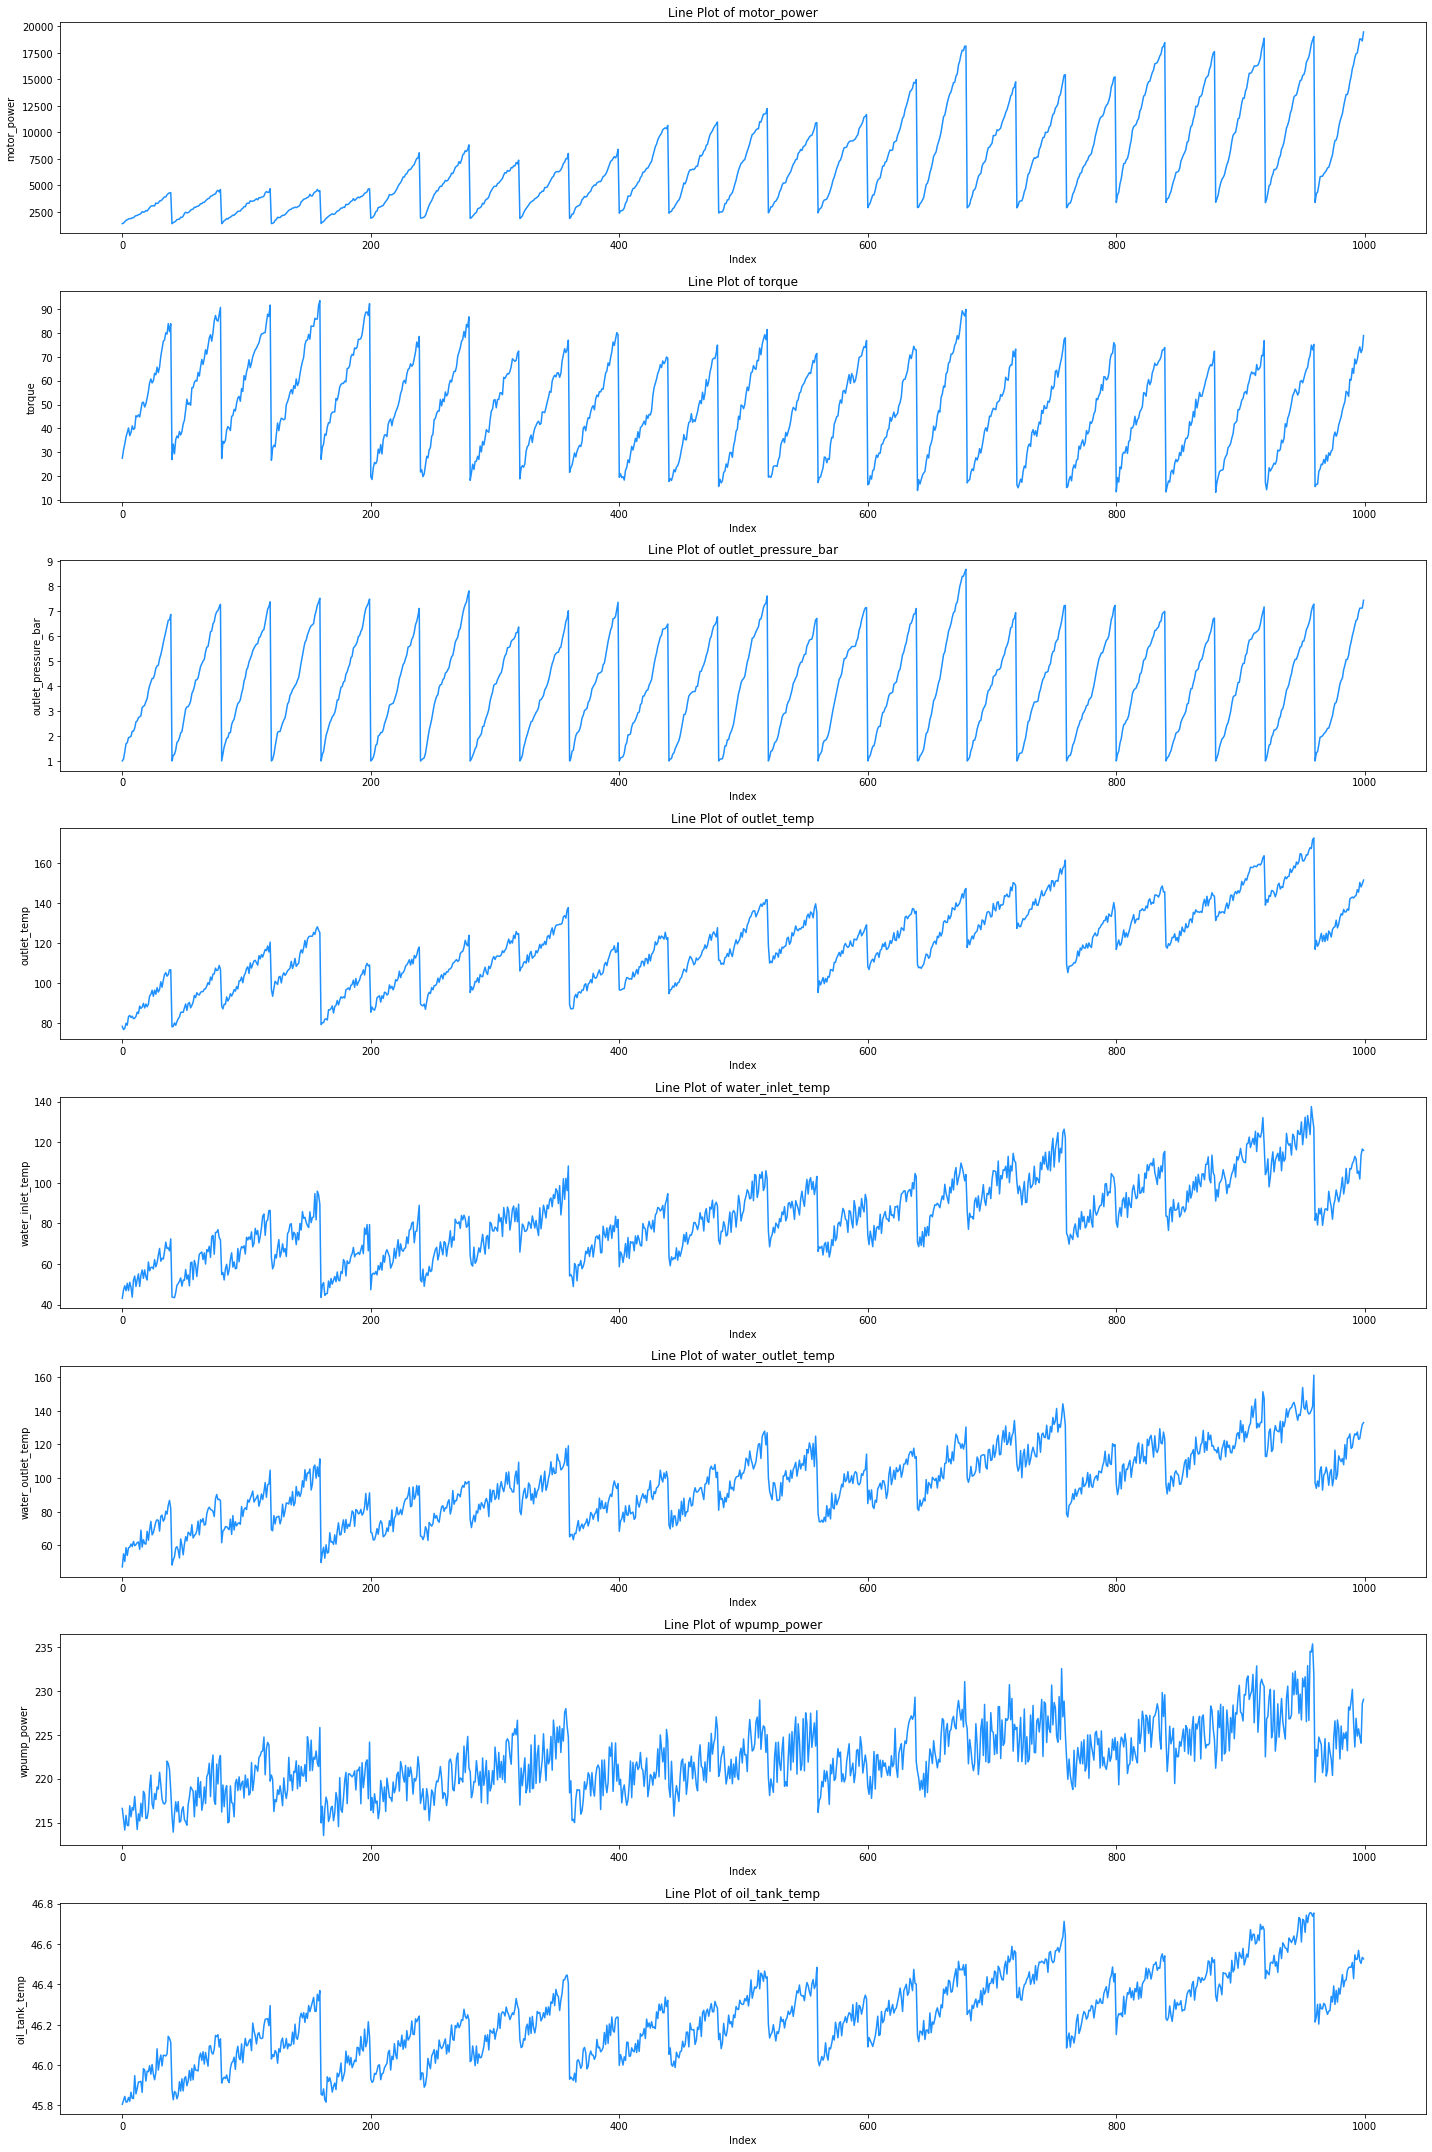

In [5]:
# Analyze physically related values
# List of columns to exclude from the visualization
exclude_columns = ['id','oilpump_power', 'wpump_outlet_press', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz', 'bearings', 'wpump', 'radiator','exvalve','water_flow', 'rpm','air_flow', 'noise_db']

# Filtered dataset excluding the specified columns
filtered_data = df.drop(columns=exclude_columns)

# Visualizing line plots for the filtered columns
plt.figure(figsize=(20, 30))
for i, col in enumerate(filtered_data.columns, 1):
    plt.subplot(len(filtered_data.columns), 1, i)
    sns.lineplot(data=filtered_data, x=filtered_data.index, y=col, color='dodgerblue')
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

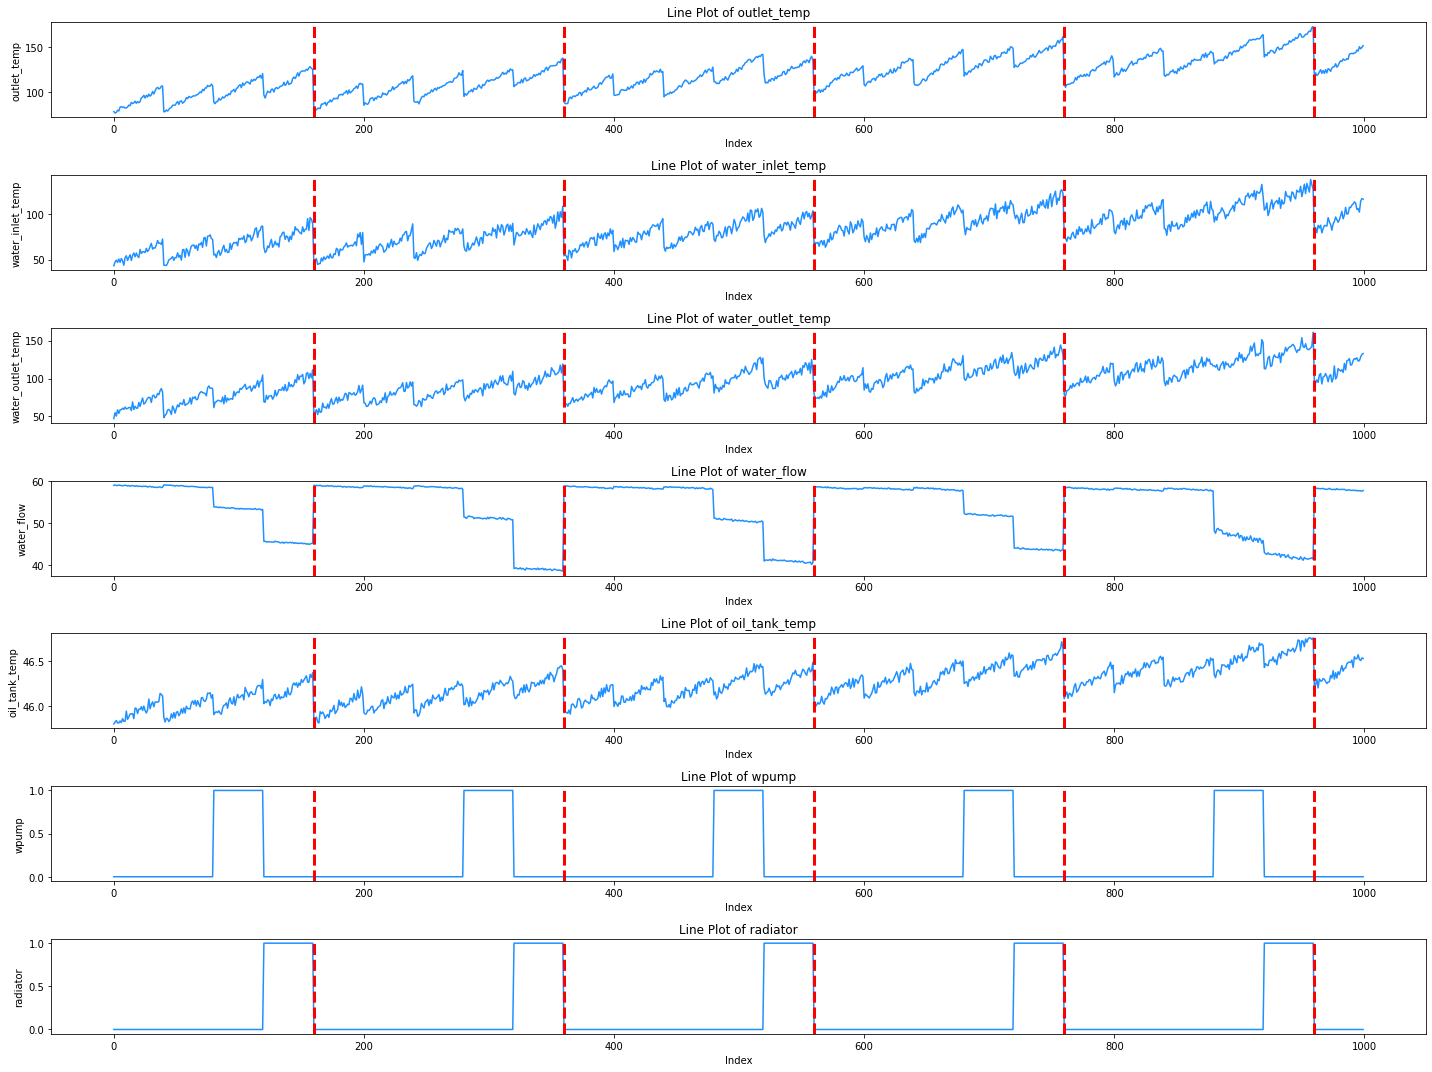

In [6]:
# Water pump and radiator influence
# List of columns to the visualization
compared_columns = ['outlet_temp','water_inlet_temp', 'water_outlet_temp', 'water_flow', 'oil_tank_temp', 'wpump', 'radiator']

# Filtered dataset excluding the specified columns
filtered_data = df[compared_columns]

# Visualizing line plots for the filtered columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(filtered_data.columns, 1):
    plt.subplot(len(filtered_data.columns), 1, i)
    sns.lineplot(data=filtered_data, x=filtered_data.index, y=col, color='dodgerblue')
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    # Adding horizontal red lines at every 160, 360, 560, and so on
    for x_val in range(160, filtered_data.shape[0], 200):
        plt.axvline(x=x_val, color='red', linestyle='--', linewidth=3)

plt.tight_layout()
plt.show()

<AxesSubplot: >

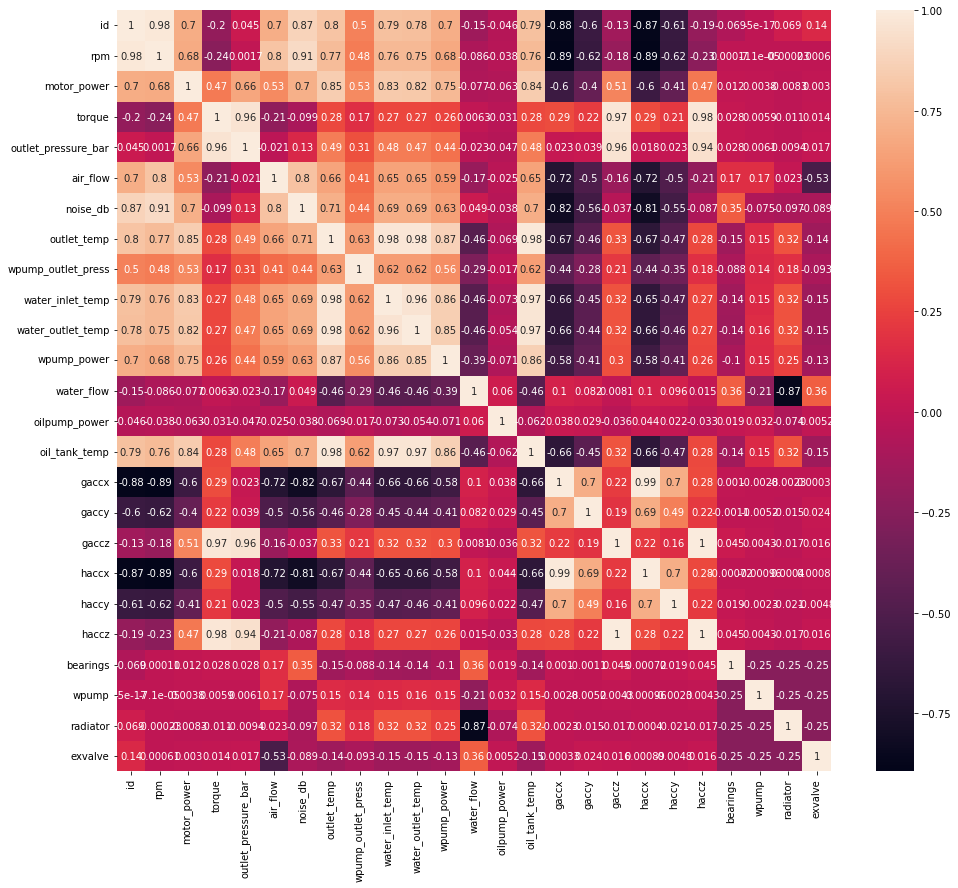

In [46]:
plt.figure(figsize= (16,14))
cor = df.corr()
sns.heatmap(cor, annot = True)


### Data Scaling

In [16]:
df.sample(5)

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve
740,741,2009,9134.229987,47.564775,4.095,1028.452536,55.163665,146.359943,3.345220,106.478088,...,0.556272,0.353368,3.380909,1.052011,1.288990,3.158433,0,0,1,0
523,524,1487,2991.645036,21.006619,1.407,806.944848,50.153906,110.374619,2.406168,74.410551,...,0.567664,0.305749,1.970799,1.070289,1.331824,2.501727,0,0,1,0
237,238,1008,7537.024170,76.189914,6.581,589.803128,51.071071,114.241258,2.530730,76.247546,...,0.599633,0.373969,6.313683,1.113686,1.393444,4.716609,0,0,0,0
195,196,489,4262.444339,86.866323,6.865,96.454318,42.522910,104.204105,2.119358,77.740127,...,0.722029,0.455692,7.323492,1.205752,1.366922,5.255902,0,0,0,1
563,564,1508,3016.007463,21.729926,1.399,292.218250,50.091312,101.160553,2.817287,68.799844,...,0.579825,0.290103,1.962378,1.066571,1.347060,2.503679,0,0,0,1


In [17]:
from sklearn import preprocessing

In [18]:
df[['rpm']] = preprocessing.scale(df[['rpm']])

In [19]:
df[['motor_power']] = preprocessing.scale(df[['motor_power']])

In [20]:
df[['torque']] = preprocessing.scale(df[['torque']])

In [21]:
df['outlet_pressure_bar'] = preprocessing.scale(df[['outlet_pressure_bar']])

In [22]:
df[['air_flow']] = preprocessing.scale(df[['air_flow']])

In [23]:
df[['noise_db']] = preprocessing.scale(df[['noise_db']])

In [24]:
df[['outlet_temp']] = preprocessing.scale(df[['outlet_temp']])

In [25]:
df[['wpump_outlet_press']] = preprocessing.scale(df[['wpump_outlet_press']])

In [26]:
df.columns

Index(['id', 'rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow',
       'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
       'water_outlet_temp', 'wpump_power', 'water_flow', 'oilpump_power',
       'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz',
       'bearings', 'wpump', 'radiator', 'exvalve'],
      dtype='object')

In [27]:
df[['wpump_power']] = preprocessing.scale(df[['wpump_power']])

In [28]:
df[['water_flow']] = preprocessing.scale(df[['water_flow']])

In [29]:
df[['oilpump_power']] = preprocessing.scale(df[['oilpump_power']])

In [30]:
df[['gaccx']] = preprocessing.scale(df[['gaccx']])

In [31]:
df[['gaccy']] = preprocessing.scale(df[['gaccy']])

In [32]:
df[['gaccz']] = preprocessing.scale(df[['gaccz']])

In [33]:
df[['haccx']] = preprocessing.scale(df[['haccx']])

In [34]:
df[['haccy']] = preprocessing.scale(df[['haccy']])

In [35]:
df[['haccz']] = preprocessing.scale(df[['haccz']])

In [36]:
df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve
0,1,-1.414501,-1.307440,-1.159221,-1.640349,-1.008727,-1.561431,-2.108796,0.353860,43.166392,...,1.874809,0.839080,-0.791184,1.915525,1.448590,-0.651635,0,0,0,0
1,2,-1.394708,-1.295365,-0.971045,-1.596843,-1.009758,-1.605684,-2.195234,-0.577740,47.342143,...,1.752929,2.491883,-0.778991,1.869888,0.710108,-0.681428,0,0,0,0
2,3,-1.420156,-1.266100,-0.839768,-1.442157,-1.010789,-1.551736,-2.161525,-1.509341,49.306593,...,1.755668,2.318938,-0.715246,1.868836,0.573986,-0.615668,0,0,0,0
3,4,-1.441362,-1.235583,-0.684141,-1.269208,-1.011698,-1.609816,-2.030032,-1.564841,46.886933,...,2.126703,0.511471,-0.650594,1.913454,2.281274,-0.488070,0,0,0,0
4,5,-1.415915,-1.223030,-0.584946,-1.247724,-1.012021,-1.512592,-2.078671,-1.012497,50.498100,...,1.806055,0.841429,-0.667126,1.844974,1.349980,-0.533027,0,0,0,0


In [37]:
df.sample(5)

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve
420,421,-0.016281,-0.169854,-0.329501,-0.244947,0.326220,-0.069846,-0.527487,-0.960745,77.790586,...,-0.403248,0.949961,-0.503002,-0.473250,0.848621,-0.510379,0,0,0,0
380,381,-0.677926,-0.454317,-0.074068,0.002659,-1.264896,-0.772968,-0.825497,-1.140417,68.479632,...,0.033525,-0.654291,-0.199994,0.042046,-0.423712,-0.194422,0,0,0,1
166,167,-1.403191,-1.145746,-0.363764,-0.914181,-1.482991,-1.513857,-1.676291,-2.040346,51.664048,...,1.677983,1.167656,-0.518971,1.783644,1.396095,-0.392137,0,0,0,1
715,716,0.682122,1.510835,0.932680,1.218668,0.959239,0.948601,1.532650,0.157206,108.377768,...,-0.672842,-0.741194,1.098459,-0.810748,-0.597456,1.033796,0,1,0,0
262,263,-0.725994,-0.352003,0.284766,0.316329,-0.343190,-0.250110,-0.690816,-1.417755,68.411026,...,0.037588,0.981186,0.147062,0.050150,-1.062187,0.113279,1,0,0,0


In [38]:
df = df.drop(['id'], axis=1)

In [39]:
target = df['bearings']

features = df.drop('bearings', axis = 1)

### Feature selection using wrapper method - Recursive, forward and backward...


In [40]:
# Feature selection using wrapper method - Recursive, forward and backward...

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logistic_regression = LogisticRegression(solver = 'liblinear')

In [41]:
rfe = RFE(estimator = logistic_regression, n_features_to_select=6)

In [42]:
rfe.fit(features,target)

RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=6)

In [43]:
rfe_features = features.columns[rfe.support_]
rfe_features

Index(['rpm', 'noise_db', 'outlet_temp', 'haccz', 'wpump', 'exvalve'], dtype='object')

In [44]:
pd.DataFrame({'features_name': features.columns, 'Rank': rfe.ranking_}).sort_values(by = 'Rank')

,features_name,Rank
0,rpm,1
20,wpump,1
19,haccz,1
6,outlet_temp,1
5,noise_db,1
22,exvalve,1
1,motor_power,2
11,water_flow,3
16,gaccz,4
10,wpump_power,5


In [45]:
rfe_df = pd.DataFrame({'RFE Method': rfe_features})
rfe_df

,RFE Method
0,rpm
1,noise_db
2,outlet_temp
3,haccz
4,wpump
5,exvalve


In [50]:
#!pip install mlxtend 

In [102]:
#!pip install joblib --upgrade

In [51]:
#import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [52]:
#Backward Feature Selection
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators = 10),
                                            k_features = 5,
                                            forward = False,
                                            scoring = 'accuracy',
                                            cv=4)

In [53]:
feature_selector.fit(features, target)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(n_estimators=10),
                          forward=False, k_features=(5, 5), scoring='accuracy')

In [54]:
backward_features = list(feature_selector.k_feature_names_)
backward_features

['rpm', 'noise_db', 'haccx', 'wpump', 'exvalve']

In [55]:
back_df = pd.DataFrame({'Backward_method': backward_features})
back_df

,Backward_method
0,rpm
1,noise_db
2,haccx
3,wpump
4,exvalve


In [56]:
#Forward features selection
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators = 10),
                                            k_features = 5,
                                            forward = True,
                                            scoring = 'accuracy',
                                            cv = 4)

In [57]:
feature_selector.fit(features, target)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(n_estimators=10),
                          k_features=(5, 5), scoring='accuracy')

In [58]:
forward_features = list(feature_selector.k_feature_names_)
forward_features

['torque', 'gaccz', 'wpump', 'radiator', 'exvalve']

In [59]:
forw_df = pd.DataFrame({'Forward Method': forward_features})
forw_df

,Forward Method
0,torque
1,gaccz
2,wpump
3,radiator
4,exvalve


In [60]:
X = df[['rpm',
 'noise_db',
 'haccx',
 'wpump',
 'radiator']]

In [61]:
Y = df[['bearings']]

In [62]:
from sklearn.model_selection import train_test_split


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, stratify=Y, random_state = 42)

In [69]:
X_train.shape

(800, 5)

In [70]:
X_test.shape

(200, 5)

In [71]:
y_train.shape

(800, 1)

In [72]:
y_test.shape

(200, 1)

### Lets start building classification model.......

In [73]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [74]:
logistic_model = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'liblinear').fit(X_train, y_train)

In [75]:
y_pred = logistic_model.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [78]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('accuracy_score :', acc)
print('precision_score :', prec)
print('recall_score :', recall)

accuracy_score : 0.995
precision_score : 1.0
recall_score : 0.975


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [80]:
#Bagging and pasting method
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators = 400,
                           bootstrap = False,
                           max_samples = 1.0,
                           n_jobs = -1)

In [81]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  n_estimators=400, n_jobs=-1)

In [82]:
y_pred = bag_clf.predict(X_test)

In [83]:
accuracy_score(y_test, y_pred)

0.99

In [84]:
precision_score(y_test, y_pred)


1.0

In [85]:
recall_score(y_test, y_pred)

0.95

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rnd_clf = RandomForestClassifier(n_estimators = 400,
                                max_leaf_nodes = 16,
                                n_jobs = -1)

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=400, n_jobs=-1)

In [88]:
y_pred = rnd_clf.predict(X_test)

In [89]:
accuracy_score(y_test, y_pred)

0.965

In [90]:
recall_score(y_test, y_pred)

0.85

In [91]:
precision_score(y_test, y_pred)

0.9714285714285714

In [92]:
# code for classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.96      0.99      0.98       160
           1       0.97      0.85      0.91        40

    accuracy                           0.96       200
   macro avg       0.97      0.92      0.94       200
weighted avg       0.97      0.96      0.96       200

[[159   1]
 [  6  34]]
